In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter 

In [4]:
#Loading Dataset
dataset=pd.read_csv("online_shoppers_intention.csv")

In [5]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
dataset.shape

(12330, 18)

In [7]:
#Counting the number of missing values
pd.DataFrame({'Count_Missing_Values' : dataset.isnull().sum()})
# We can see that there are no missing values
# Alternatively, dataset.isna() command can also be used to find if there are any missing values

,Count_Missing_Values
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [8]:
#Finding datatype of variables
dataset.info()
# Since there are no missing values in our data, dataset.dtypes command can also be used to find the datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
#Finding descriptive statistics
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
#Finding minimum and maximum values
print('Max Administrative_Duration : ', dataset['Administrative_Duration'].max())
print('Min Administrative_Duration: ', dataset['Administrative_Duration'].min())


Max Administrative_Duration :  3398.75
Min Administrative_Duration:  0.0


In [11]:
print('Max ProductRelated_Duration : ', dataset['ProductRelated_Duration'].max())
print('Min ProductRelated_Duration: ', dataset['ProductRelated_Duration'].min())

Max ProductRelated_Duration :  63973.52223
Min ProductRelated_Duration:  0.0


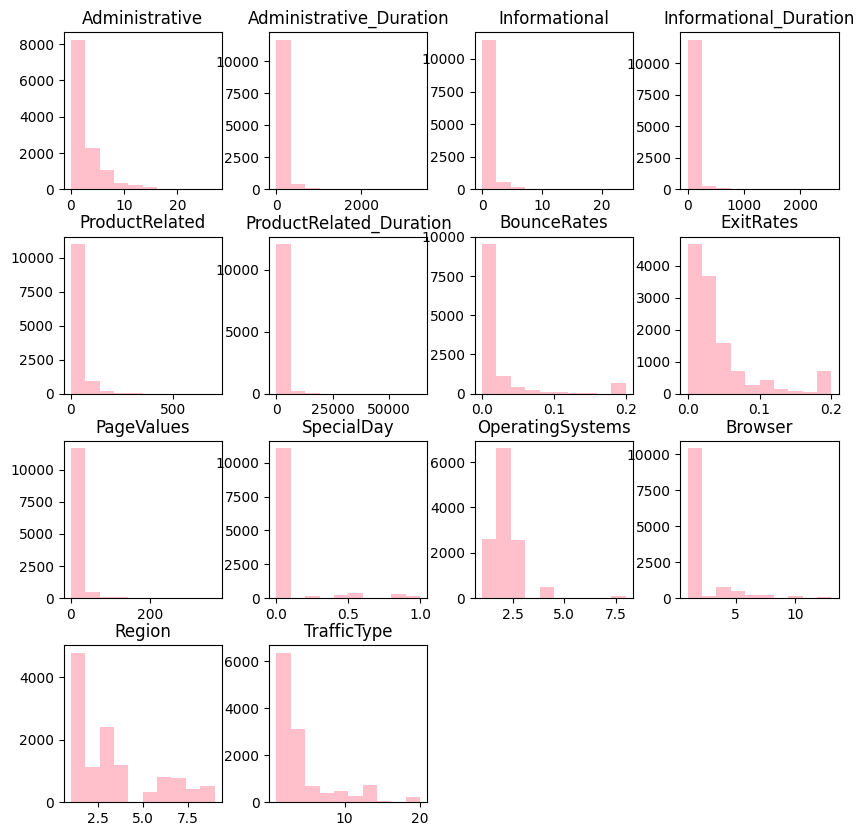

In [12]:
dataset.hist(figsize=(10,10),color="pink",grid=False)
plt.show()


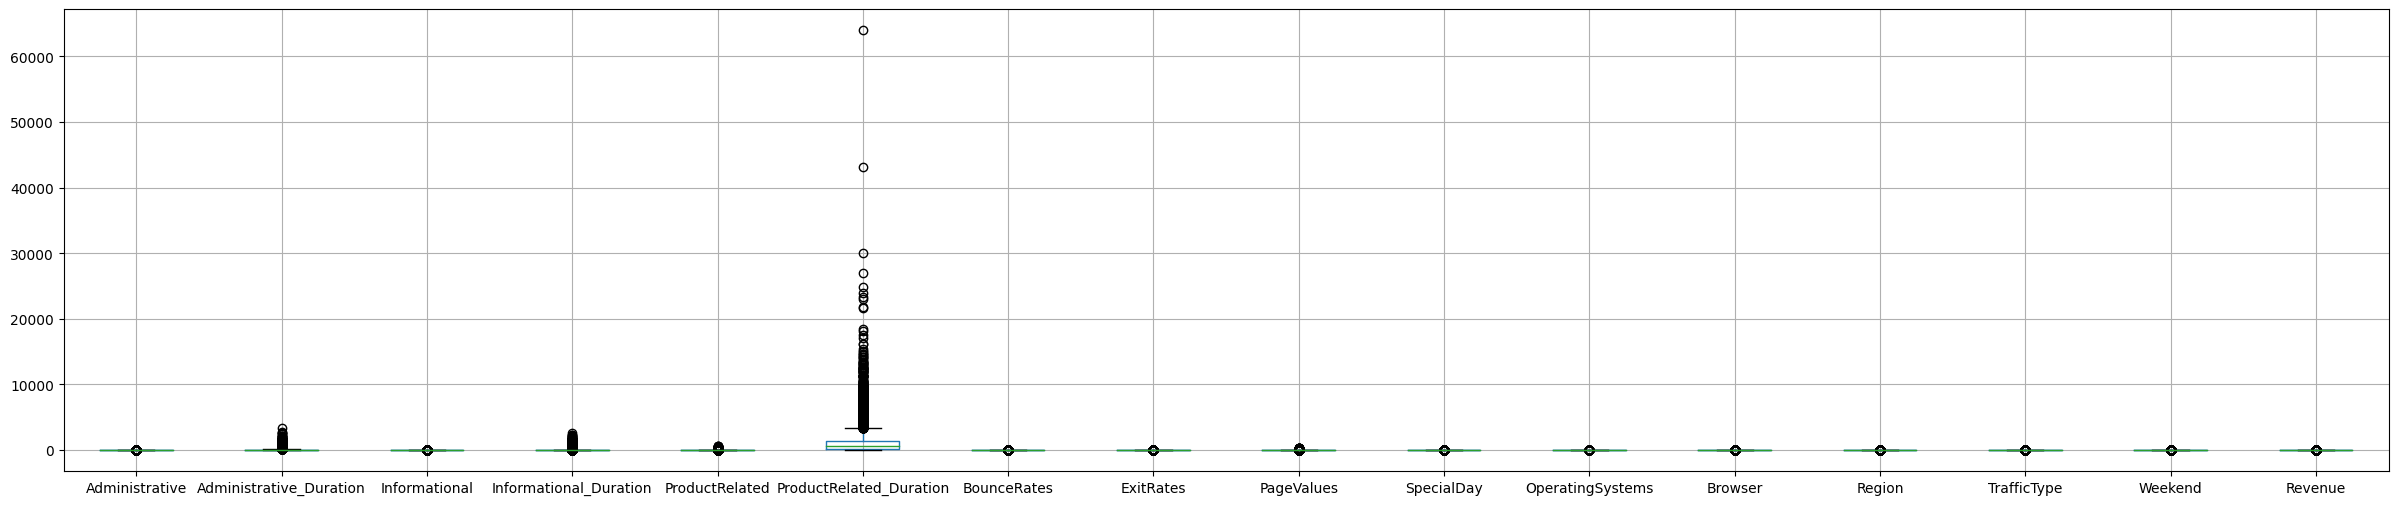

In [13]:
plt.figure(figsize=(30, 6))
dataset.boxplot()
plt.show()

C:\Users\sharl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Product Related Duration Boxplot')

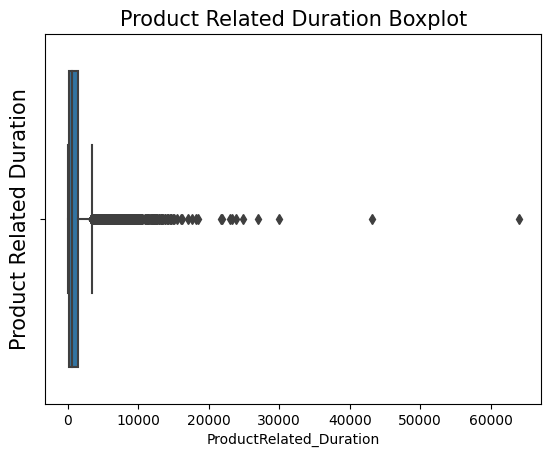

In [14]:
sns.boxplot(x = 'ProductRelated_Duration', data = dataset, orient = 'v')
plt.ylabel("Product Related Duration", fontsize=15)
plt.title('Product Related Duration Boxplot', fontsize=15)

C:\Users\sharl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Administrative_Duration Boxplot')

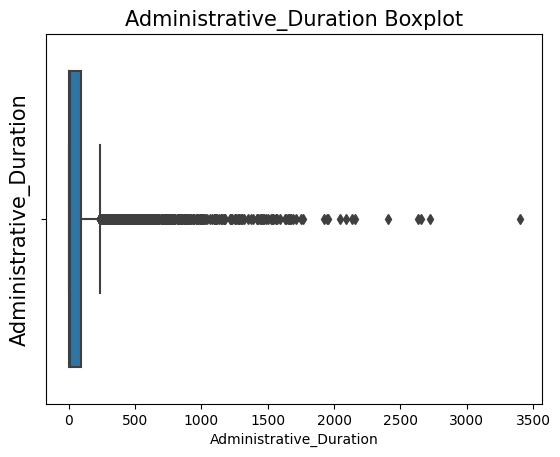

In [15]:
sns.boxplot(x = 'Administrative_Duration', data = dataset, orient = 'v')
plt.ylabel("Administrative_Duration", fontsize=15)
plt.title('Administrative_Duration Boxplot', fontsize=15)

C:\Users\sharl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Informational_Duration')

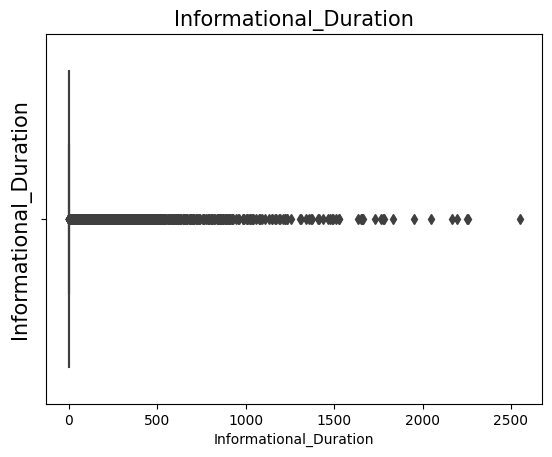

In [16]:
sns.boxplot(x = 'Informational_Duration', data = dataset, orient = 'v')
plt.ylabel("Informational_Duration", fontsize=15)
plt.title('Informational_Duration', fontsize=15)

In [17]:
[Counter(dataset['TrafficType'])]

[Counter({1: 2451,
          2: 3913,
          3: 2052,
          4: 1069,
          5: 260,
          6: 444,
          7: 40,
          8: 343,
          9: 42,
          10: 450,
          11: 247,
          12: 1,
          13: 738,
          14: 13,
          15: 38,
          18: 10,
          19: 17,
          16: 3,
          17: 1,
          20: 198})]

In [18]:
#Counting the number of returning visitors, new visitors and other visitors in Visitor Type
[Counter(dataset['VisitorType'])]

[Counter({'Returning_Visitor': 10551, 'New_Visitor': 1694, 'Other': 85})]

In [19]:
[Counter(dataset['Revenue'])]

[Counter({False: 10422, True: 1908})]

In [20]:
[Counter(dataset['Weekend'])]

[Counter({False: 9462, True: 2868})]

In [21]:
[Counter(dataset['SpecialDay'])]

[Counter({0.0: 11079, 0.4: 243, 0.8: 325, 1.0: 154, 0.2: 178, 0.6: 351})]

In [22]:
[Counter(dataset['Region'])]

[Counter({1: 4780,
          9: 511,
          2: 1136,
          3: 2403,
          4: 1182,
          5: 318,
          6: 805,
          7: 761,
          8: 434})]

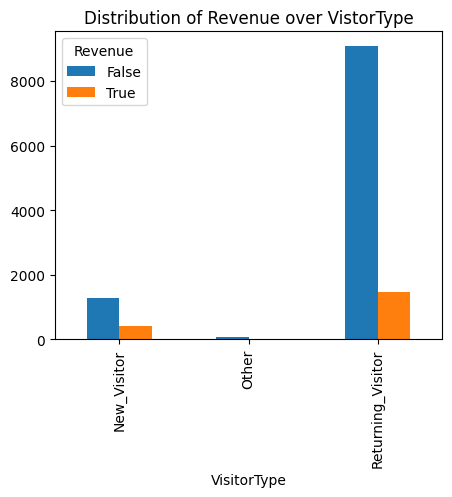

In [23]:
pd.crosstab(dataset['VisitorType'],dataset['Revenue']).plot(kind='bar',figsize=(5,4),title="Distribution of Revenue over VistorType")
plt.show();

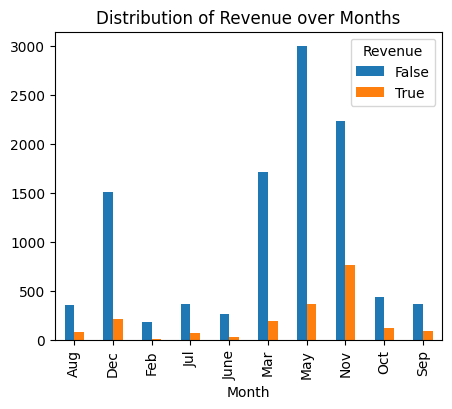

In [24]:
df = dataset.sort_values('Month')
pd.crosstab(df['Month'],df['Revenue']).plot(kind='bar',figsize=(5,4),title="Distribution of Revenue over Months")
plt.show();

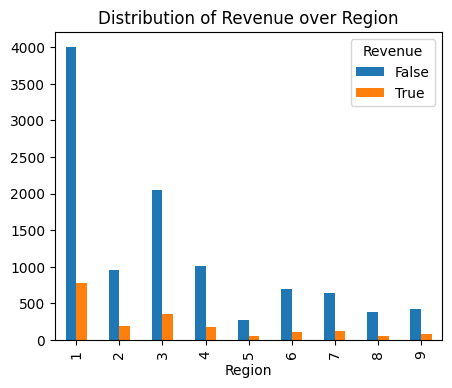

In [25]:
pd.crosstab(dataset['Region'],dataset['Revenue']).plot(kind='bar',figsize=(5,4),title="Distribution of Revenue over Region")
plt.show();

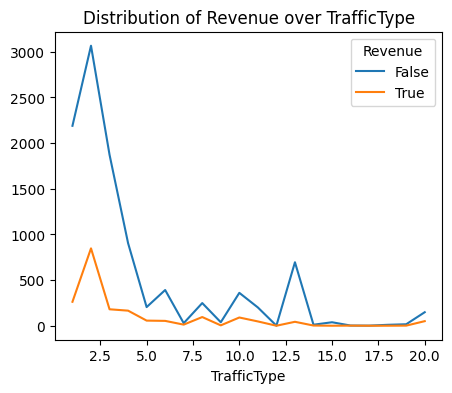

In [26]:
pd.crosstab(dataset['TrafficType'],dataset['Revenue']).plot(kind='line',figsize=(5,4),title="Distribution of Revenue over TrafficType")
plt.show();

In [27]:
#Using Dummy variables to convert VisitorType and Month from category
dataset = pd.get_dummies( dataset, columns = ['VisitorType','Month'])

In [28]:
dataset['Weekend'] = dataset['Weekend'].astype(int)


In [29]:
#X consists of all columns except the revenue column and the dependent variable Y takes the values of the revenue column
X = dataset.drop('Revenue', axis=1)
Y = dataset['Revenue']

In [30]:
#Using Label Encoding on dependent variable Y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

<Axes: >

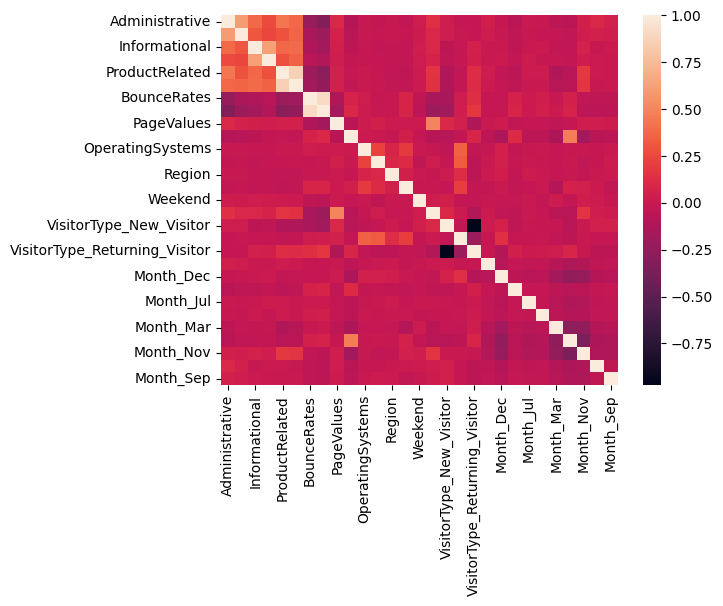

In [31]:
#Plotting Heatmap
sns.heatmap(dataset.corr())

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [33]:
print(X_train)

       Administrative  Administrative_Duration  Informational   
2509                0                 0.000000              0  \
11116               7               170.500000              3   
7292                5                91.000000              2   
7394                6                90.600000              0   
4946                0                 0.000000              1   
...               ...                      ...            ...   
4859                1                 4.000000              0   
3264                0                 0.000000              0   
9845               13               331.983333              5   
10799               0                 0.000000              0   
2732                3                45.500000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration   
2509                      0.0              16               534.916667  \
11116                   161.5             114              3494.831225 

In [34]:
print(X_test)

       Administrative  Administrative_Duration  Informational   
12245               0                 0.000000              0  \
9704               16               180.666667              1   
9177                9               186.673077              0   
8848                0                 0.000000              0   
2768                0                 0.000000              0   
...               ...                      ...            ...   
9606                2                36.750000              2   
9095                3               116.500000              0   
3172                6               277.166667              2   
8009                1                65.500000              1   
1672                2                21.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration   
12245                    0.00              74              3109.404167  \
9704                   649.25             113              8041.588870 

In [35]:
print(Y_train)

[0 0 0 ... 1 0 0]


In [36]:
print(Y_test)

[0 0 0 ... 0 0 1]


In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print(X_train)

[[-0.69847163 -0.45368339 -0.39210741 ... -0.56361302 -0.21607708
  -0.19009065]
 [ 1.410228    0.49715792  1.95245564 ... -0.56361302 -0.21607708
  -0.19009065]
 [ 0.80774239  0.05380376  1.17093462 ... -0.56361302  4.62797816
  -0.19009065]
 ...
 [ 3.21768484  1.39771525  3.51549768 ...  1.77426705 -0.21607708
  -0.19009065]
 [-0.69847163 -0.45368339 -0.39210741 ...  1.77426705 -0.21607708
  -0.19009065]
 [ 0.20525678 -0.19993981 -0.39210741 ... -0.56361302 -0.21607708
  -0.19009065]]


In [39]:
print(X_test)

[[-0.69847163 -0.45368339 -0.39210741 ...  1.77426705 -0.21607708
  -0.19009065]
 [ 4.12141325  0.5538552   0.38941361 ... -0.56361302 -0.21607708
  -0.19009065]
 [ 2.01271362  0.58735164 -0.39210741 ...  1.77426705 -0.21607708
  -0.19009065]
 ...
 [ 1.1089852   1.09201465  1.17093462 ... -0.56361302 -0.21607708
  -0.19009065]
 [-0.39722883 -0.08840417  0.38941361 ...  1.77426705 -0.21607708
  -0.19009065]
 [-0.09598602 -0.33657097 -0.39210741 ... -0.56361302 -0.21607708
  -0.19009065]]


In [40]:
#Fitting logistic model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [41]:
Y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
result=list(zip(Y_pred,Y_test))
print(result)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [42]:
#Confusion Matrix
# Calculating accuracy measures and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score  
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
accuracy_score(Y_test, Y_pred)

[[1992   52]
 [ 266  156]]


0.8710462287104623

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [66]:
Y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
result=list(zip(Y_pred,Y_test))
print(result)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [67]:
#Confusion matrix of KNN
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[1979   65]
 [ 274  148]]


0.8625304136253041

In [77]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [78]:
Y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
result=list(zip(Y_pred,Y_test))
print(result)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [79]:
#Confusion Matrix of SVM
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[1987   57]
 [ 269  153]]


0.8678021086780211

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
Y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
result=list(zip(Y_pred,Y_test))
print(result)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [70]:
#Confusion Matrix of Decision Tree
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[1873  171]
 [ 196  226]]


0.85117599351176

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [72]:
Y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
result=list(zip(Y_pred,Y_test))
print(result)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [73]:
#Confusion Matrix of Random Forest
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[1976   68]
 [ 203  219]]


0.8901054339010543